In [1]:
import pickle
import numpy as np
import tensorflow as tf

In [8]:
with open("stats.pickle", "rb") as f:
    stats = pickle.load(f)
with open("buttons.pickle", "rb") as f:
    buttons = pickle.load(f)

In [9]:
print(buttons[0])
print(len(buttons))

[False False False False False False False False False False False False]
2468


In [10]:
print(stats[700])
print(stats[700]['collision'])

{'powerup_mode': 1, 'collision': 188612837, 'coins': 5, 'level': 202, 'x_position': 2873, 'lives': 3, 'y_position': 197, 'airborne': 11, 'score': 1025}
188612837


In [11]:
train = []
index = [1]
for dic in stats:
#     print(list(dic.values()))
#     delete 2nd entry "collision" because it doesn't seem to be read properly
    entry = np.delete(np.array(list(dic.values())), index)
#     print(entry)
#     break
    train.append(entry)
train = np.array(train)
print(train.shape)

#     for key in dic:
#         print(dic[key])
#     break

(2468, 8)


In [12]:
buttons = np.array(buttons)

In [29]:
# stats model

# Single linear layer, no activation, with l2 regularization
input_layer = tf.keras.layers.Input(shape=(8))
# for i in range(3):
#     x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2')(x)
x = tf.keras.layers.Dense(
    32, 
    kernel_regularizer=None, 
    name="main_layer", 
    activation='relu')(input_layer)

x = tf.keras.layers.Dense(
    16, 
    kernel_regularizer=None, 
    name="main_layer2", 
    activation='relu')(x)

out = tf.keras.layers.Dense(
    12, 
    kernel_regularizer=None, 
    name="button_layer", 
    activation='sigmoid')(x)
# embedding = tf.keras.layers.Dense(latent_size, kernel_regularizer=None, name="mem_embedding_layer")(x)


stats_model = tf.keras.Model(input_layer, out)

stats_model.compile(optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['binary_crossentropy', "binary_accuracy"])
stats_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
main_layer (Dense)           (None, 32)                288       
_________________________________________________________________
main_layer2 (Dense)          (None, 16)                528       
_________________________________________________________________
button_layer (Dense)         (None, 12)                204       
Total params: 1,020
Trainable params: 1,020
Non-trainable params: 0
_________________________________________________________________


In [30]:
buttons.shape

(2468, 12)

In [31]:
X = train
Y = buttons

result = stats_model.fit(X, 
                         Y, 
#                              validation_data=([test_inputs[0], test_inputs[1]], test_outputs),
                         epochs=100, 
                         batch_size=16, 
                         verbose=1)

Epoch 1/100
155/155 [==============================] - 0s 1ms/step - loss: 197.7678 - binary_crossentropy: 197.7678 - binary_accuracy: 0.8151
Epoch 2/100
155/155 [==============================] - 0s 999us/step - loss: 11.7334 - binary_crossentropy: 11.7334 - binary_accuracy: 0.8972
Epoch 3/100
155/155 [==============================] - 0s 1ms/step - loss: 7.1024 - binary_crossentropy: 7.1024 - binary_accuracy: 0.8909
Epoch 4/100
155/155 [==============================] - 0s 1ms/step - loss: 4.8584 - binary_crossentropy: 4.8584 - binary_accuracy: 0.8926
Epoch 5/100
155/155 [==============================] - 0s 1ms/step - loss: 4.3912 - binary_crossentropy: 4.3912 - binary_accuracy: 0.9009
Epoch 6/100
155/155 [==============================] - 0s 1ms/step - loss: 3.4799 - binary_crossentropy: 3.4799 - binary_accuracy: 0.9027
Epoch 7/100
155/155 [==============================] - 0s 1ms/step - loss: 3.4699 - binary_crossentropy: 3.4699 - binary_accuracy: 0.9029
Epoch 8/100
155/155 [=====

In [32]:
train[None, 700]

array([[   1,    5,  202, 2873,    3,  197,   11, 1025]])

In [33]:
p = stats_model.predict([train[None, 200]])

In [34]:
p

array([[2.1715070e-01, 4.7321370e-01, 1.1802129e-03, 9.2832517e-04,
        1.0335300e-02, 4.0012114e-02, 4.2644180e-02, 2.4373613e-01,
        4.9170557e-02, 9.6341800e-03, 2.3230442e-03, 3.6280580e-05]],
      dtype=float32)

In [38]:
probs = np.around(p, 3)

<BarContainer object of 12 artists>

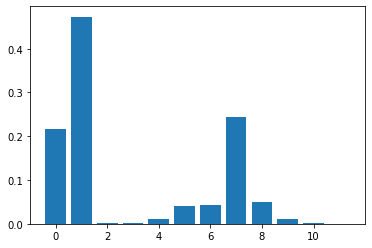

In [41]:
plt.bar(np.arange(12), probs[0])

<BarContainer object of 12 artists>

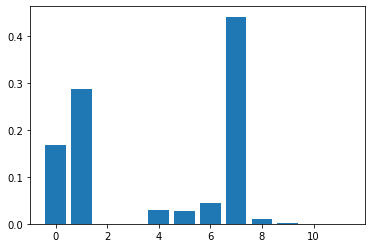

In [42]:
import matplotlib.pyplot as plt

plt.bar(np.arange(12), buttons.mean(axis=0))
# plt.plot(buttons[300:370])

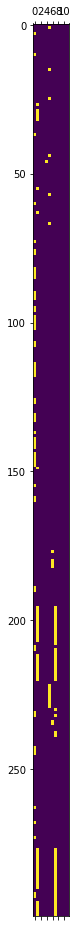

In [28]:
plt.matshow(buttons[100:400])

In [ ]:
# Ken TODO: Fix this reference chart with the human_play.py experimental script
# R | L | X | A | Right | Left | Y | B | Select | Start | Up | Down |

In [ ]:
# Ken TODO: Get this integrated with WANDB VVVVVVVV

In [ ]:
# wandb setup, execute first to log into wandb
run = wandb.init(
    project="turbocharger",
    job_type='training')

In [ ]:
stats_model.save("./stats_model")

In [ ]:
artifact = wandb.Artifact('models', type='model')
artifact.add_dir('buttons_model', name='buttons_model')
artifact.add_dir('embed_mem_model', name='embed_mem_model')
run.log_artifact(artifact)

In [ ]:
# Ken TODO: Bring back the timeline making code, and add a goal stats state input to the NN